Leaky Integrate-and-Fire Neuron Models. 
Somewhere in the middle of the divide lies the leaky integrate-and-fire (LIF) neuron model. It takes the sum of weighted inputs, much like the artificial neuron. But rather than passing it directly to an activation function, it will integrate the input over time with a leakage, much like an RC circuit. If the integrated value exceeds a threshold, then the LIF neuron will emit a voltage spike. The LIF neuron abstracts away the shape and profile of the output spike; it is simply treated as a discrete event. As a result, information is not stored within the spike, but rather the timing (or frequency) of spikes. Simple spiking neuron models have produced much insight into the neural code, memory, network dynamics, and more recently, deep learning. The LIF neuron sits in the sweet spot between biological plausibility and practicality.

In [5]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

The different versions of the LIF model each have their own dynamics and use-cases. snnTorch currently supports the following LIF neurons:
* Lapicque's RC model: ``snntorch.Lapicque``
* 1st-order model: ``snntorch.Leaky`` 
* Synaptic Conductance-based neuron model: ``snntorch.Synaptic``
* Recurrent 1st-order model: ``snntorch.RLeaky``
* Recurrent Synaptic Conductance-based neuron model: ``snntorch.RSynaptic``
* Alpha neuron Model: ``snntorch.Alpha``


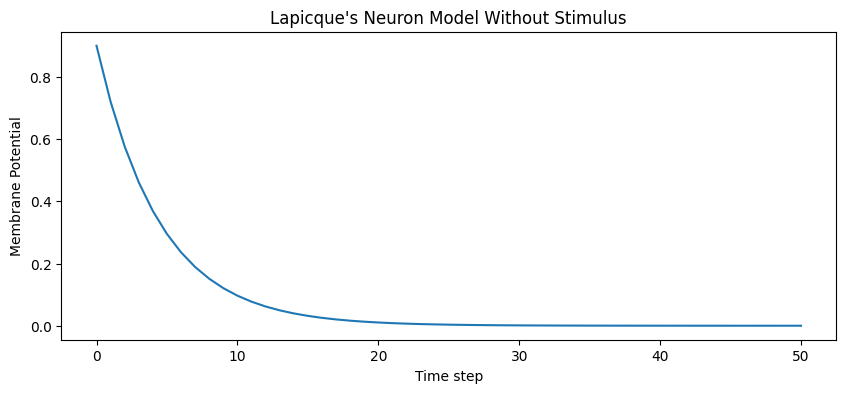

In [7]:
num_steps = 50
time_step = 1e-3
R = 5
C = 1e-3
# leaky integrate and fire neuron, tau=5e-3
lif1 = snn.Lapicque(R=R, C=C, time_step=time_step)
# Initialize membrane, input, and output
mem = torch.ones(1) * 0.9  # U=0.9 at t=0
cur_in = torch.zeros(num_steps, 1)  # I=0 for all t
spk_out = torch.zeros(1)  # initialize output spikes
# A list to store a recording of membrane potential
mem_rec = [mem]
# pass updated value of mem and cur_in[step]=0 at every time step
for step in range(num_steps):
  spk_out, mem = lif1(cur_in[step], mem)

  # Store recordings of membrane potential
  mem_rec.append(mem)

# convert the list of tensors into one tensor
mem_rec = torch.stack(mem_rec)

# Define the plotting function
def plot_mem(mem_rec, title):
    plt.figure(figsize=(10, 4))
    plt.plot(mem_rec.numpy())
    plt.title(title)
    plt.xlabel("Time step")
    plt.ylabel("Membrane Potential")
    plt.show()

# pre-defined plotting function
plot_mem(mem_rec, "Lapicque's Neuron Model Without Stimulus")